# <font color = 'red'> ЛР 8. Наивный баесовский классификатор. Калибровка вероятностей в моделях классификации</font>

Сложность: <font color = 'red'> Сложно  </font>.

Дата составления: 11.11.2024

Срок выполнения: 1 неделя (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Наивный Байесовский классификатор </font>

Наивный Байесовский классификатор — это условная модель позволяющая на основе исходных данных вычислить вероятности попадания в класс тестового сэмпла и принять решение о классификации на основе вероятности.

Подробнее см лекционные записи.


Несколько полезных ссылок. 

1. [Годная статья на вики](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
2. [Альтернатива](https://medium.com/@kashishdafe0410/gaussian-naive-bayes-understanding-the-basics-and-applications-52098087b963)






### <font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте собственную учебную функцию (класс) для классификации  с помощью Гауссовского наивного Байесовского классификатора.
2. Протестируйте полученную вами функцию на искусственных тестовых данных.
3. Обучите на тех же данных классификатор с помощью встроенного класса *GaussianNB*.
4. Сравните работу полученных моеделей.
5. Можно ли переобучить такой классификатор? Эмпирически подтвердите!

### <font color = 'red' size = 5>Задание 2 </font>


Для датасета [об использовании телефона](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset):

1. Проведите предварительную обработку данных. Автоматически загрузите их в Google colab.
2. Постройте модели классификации на основе ниавного Байесовского классификатора. 
3. Сделайте выводы о точности моделей. Выберите самую оптимальную. Тщательно поясните свой выбор!
4. Попробуйте применить для классификации распределения отличные от Гауссовского*







## <font color = 'green'> 2. Проблема фильтрации спама </font>

Вся мощь наивного Байеса раскрывается, когда мы начинаем использовать различные распределения для различных фич.
В частности отдельного внимания заслуживает работа с категориальными фичами.
Рассмотрим задачу определения спама.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re

In [3]:
data = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
X = data["v2"].values
X[:3]

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
      dtype=object)

In [6]:
y = data['v1'].map({'ham':0,'spam':1}).values
y[:3]

array([0, 0, 1], dtype=int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
def tokenize(message):
    message = message.lower()
    all_words = re.findall("[a-z0-9]+", message)
    return np.array(list(set(all_words)))
    

In [16]:
tokenize(X_train[0])

array(['naked', 'yo', 'at', 'boat', 'my', 'me', 'here', 'half', 'on', 'm',
       'i', 'the', 'check', 'same', 'still', 'in', 'no', 'moms', 'out'],
      dtype='<U5')

### <font color = 'red' size = 5>Задание 3 </font>


Для датасета данных из файла "spam.csv" построить модель классификатора на основе наивного Байеса.

1. Реализуйте самостоятельно модель классификации, не используя модели из sklearn. Подробнее [тут](https://www.bazhenov.me/blog/2012/06/11/naive-bayes.html)
2. Оцените качество модели.
3. Попробуйте реализовать подобный классификатор для данных об [отзывах на фильмы](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) из предыдущих ЛР.


## <font color = 'green'> 3. Калибровка моделей по вероятности</font>

Проблема калибровки вероятностей моделей встаёт перед нами, когда нам важны вероятности предсказаний, а не только итоговое решение о классификации. На лекции был разобран пример, когда вероятности, которые возвращает *predict_proba* не соответсвуют реальному распределению на таргете. 
Подообнее [тут](https://habr.com/ru/companies/otus/articles/573924/)

In [22]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

In [23]:
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2, n_redundant=0,random_state=12)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
y.shape

(100000,)

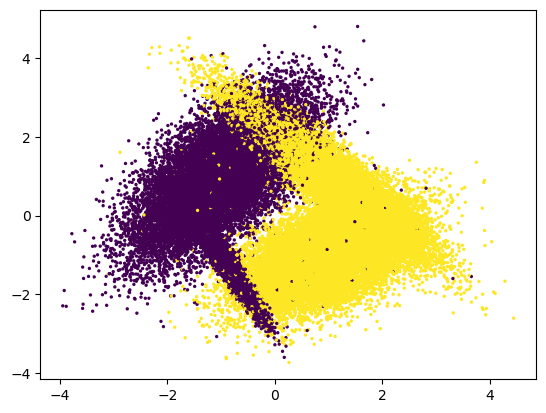

In [26]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=2)
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB

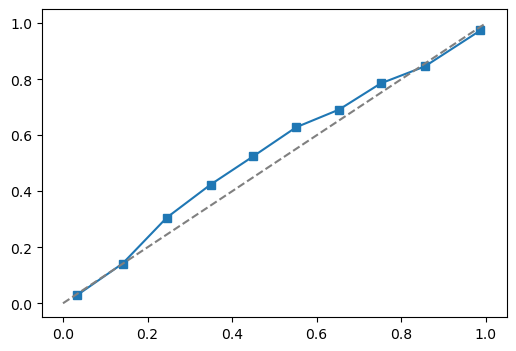

In [31]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_test_predict_proba = clf.predict_proba(X_test)[:, 1]
from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)
plt.figure(figsize=(6, 4))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.show()

### <font color = 'red' size = 5>Задание 4 </font>


1. На искусственных и реальных данных приведите пример на искусственных и реальных данных, когда модель плохо откалибрована. Графически подтвердите!
2. Используя изотоническую регрессию исправьте калибровку моделей.
3. Используя искусственные данные и различные модели классификации приведите пример всех типов неоткалиброванных моделей.
    
    3.1 Систематическая переоценка.
    
    3.2 Систематическая недооценка.
    
    3.3 Центр распределения слишком тяжелый.
    
    3.4 Хвосты распределения слишком тяжелые.

   Откалибруйте полученные модели.